Clustering very important for business. Clustering customers into various groups will help to run perfect marketing campeign and help to get more response from the campeign. In this project I'll perform clustering on an eCommerce dataset. In the first notebook I'll do EDA and in the next two notebook I'll perform feature engineering and apply machine learning to segmentize customer into different groups.

In [1]:
# Importing required libraries for data manipulation & visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# setting style of seaborn plot
sns.set_theme(style='whitegrid')

# for ignoring any unwanted warning
import warnings
warnings.filterwarnings('ignore')

# for finding optimum cluster
import scipy.cluster.hierarchy as sch

In [2]:
# let's import the dataset
df = pd.read_csv('eCommerce.csv')

# view top five rows of the dataset
df.head()

,ID,n_clicks,n_visits,amount_spent,amount_discount,days_since_registration,profile_information
0,2085,643,142,300.000000,228.432503,132,411
1,742,527,95,743.832508,60.882831,86,184
2,750,367,49,305.668886,72.961801,334,329
3,1224,466,30,291.191193,101.903170,131,148
4,2210,715,169,703.136878,506.416735,114,160


In [3]:
# see the shape of the dataset
df.shape

(2500, 7)

The dataset has 2500 rows and 7 columns or features. Based on which we'll perform clustering.

In [4]:
# Now see the basic information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       2500 non-null   int64  
 1   n_clicks                 2500 non-null   int64  
 2   n_visits                 2500 non-null   int64  
 3   amount_spent             2500 non-null   float64
 4   amount_discount          2500 non-null   float64
 5   days_since_registration  2500 non-null   int64  
 6   profile_information      2500 non-null   int64  
dtypes: float64(2), int64(5)
memory usage: 136.8 KB


Looks like there is no null value in this dataset. which will be great for performing our task.

In [5]:
# Let's see a summary statistic of the dataset
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,2500.0,1249.500000,721.832160,0.0,624.750000,1249.500000,1874.250000,2499.000000
n_clicks,2500.0,408.680000,186.414090,50.0,274.750000,378.000000,522.000000,1246.000000
n_visits,2500.0,94.475600,38.866356,10.0,67.000000,92.000000,119.000000,259.000000
amount_spent,2500.0,1445.090745,1167.663473,0.0,609.618538,1036.189112,1949.270949,6567.402267
amount_discount,2500.0,388.508637,487.143968,0.0,56.298615,137.454623,679.540536,2428.406527
days_since_registration,2500.0,200.973600,99.136618,0.0,130.000000,200.000000,268.000000,514.000000
profile_information,2500.0,201.040400,100.139213,0.0,132.000000,201.000000,270.000000,585.000000


Here in this dataset "Profile Information" might a very useful feature which has a mean of 201.04 with a standard deviation of 100.13 which means it deviates a lot.

Some other important features like "n_clicks, n_visits, amount_discount & amount_spent" may play a great role for the clustering.

## Exploratory Data Analysis

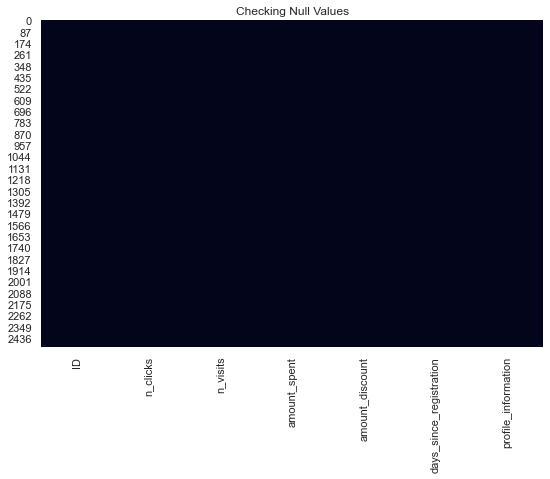

In [6]:
# first let's see if any null value is there
plt.figure(figsize = (9,6))
sns.heatmap(df.isnull(), cbar=False)
plt.title('Checking Null Values')
plt.show()

As said before no null values appears in this dataset.

<Figure size 576x576 with 0 Axes>

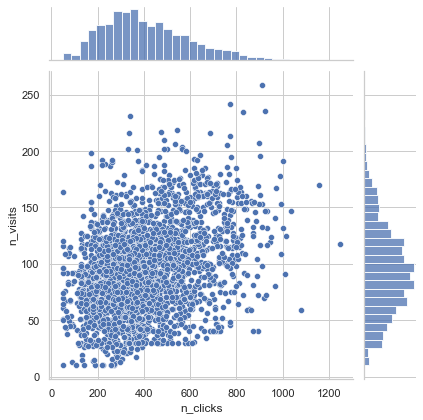

In [7]:
# Now let's use a jointplot for "n_clicks & n_views"
plt.figure(figsize = (8,8))
sns.jointplot(x = 'n_clicks', y = 'n_visits', data = df)
plt.show()

This two features has a little linear relationship & both of them has almost normal distribution

<Figure size 4500x4500 with 0 Axes>

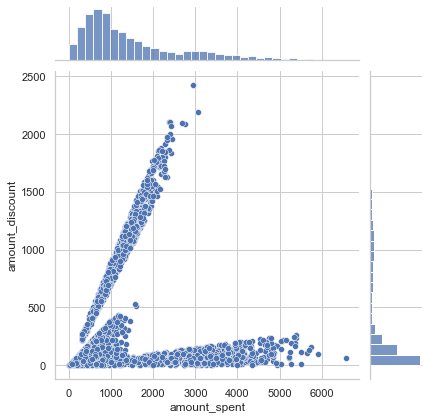

In [8]:
# Let's see for "amount_spent & amount_discount"
plt.figure(figsize=(9,9), dpi = 500)
sns.jointplot(x = 'amount_spent', y = 'amount_discount', data = df)
plt.show()

amount_discount & amount_spent don't have any linear relationship between them and both of them are skewdly distributed.

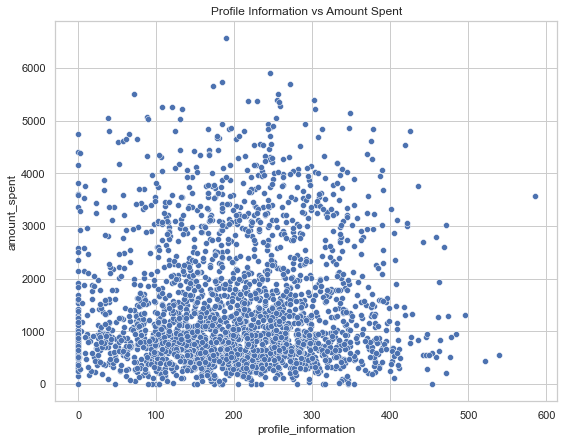

In [9]:
# Let's see the relationship between 'amount_spent' & 'Profile_information'
plt.figure(figsize=(9,7))
sns.scatterplot(x = 'profile_information', y = 'amount_spent', data = df)
plt.title('Profile Information vs Amount Spent')
plt.show()

Here we can see that those profile score is in between 100 to 300 their number is larger and they spend less than 1500 on average.

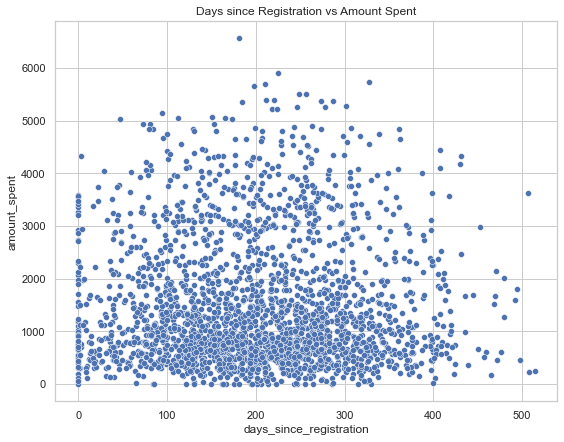

In [10]:
# Let's observe 'amount_spent' with 'days_since_registration'
plt.figure(figsize=(9,7))
sns.scatterplot(x = 'days_since_registration', y = 'amount_spent', data = df)
plt.title('Days since Registration vs Amount Spent')
plt.show()

Most of the customer is registered between 100 to 300 days and their spending amount is less than 2000 on average.

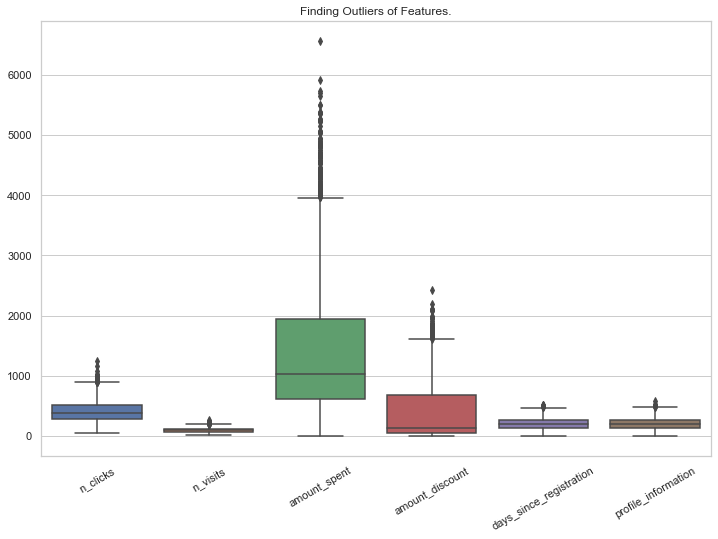

In [11]:
# Let's use some boxplot to see if there is any outliers or not

plt.figure(figsize=(12,8))
ax = sns.boxplot(data = df.drop('ID', axis = 1))
ax.set_xticklabels(ax.get_xticklabels(),rotation = 30)
ax.set_title('Finding Outliers of Features.')
plt.show()

Here these columns have some variable. Will see this later and for this type of problems DBSCAN algorithm is perfect. We'll use it but also other algoritms to see performance difference. and also take care of these outliers for k-means algorithms

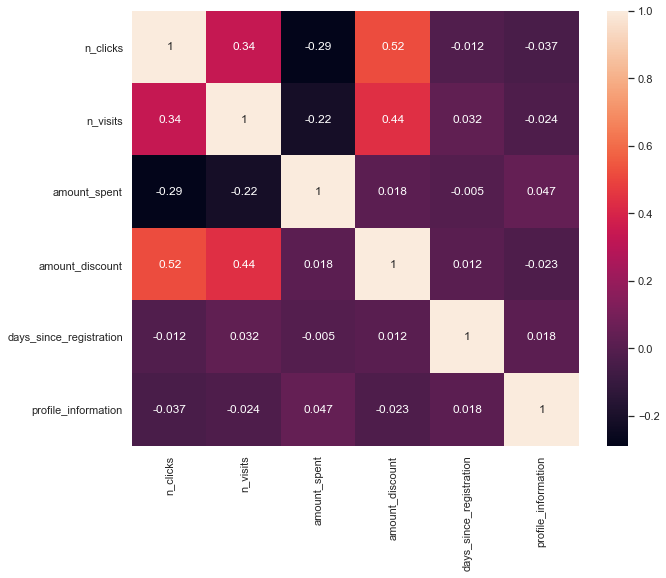

In [12]:
# Now let's see the correlation of between the columns
plt.figure(figsize=(10,8))
sns.heatmap(df.drop('ID', axis = 1).corr(), annot= True)
plt.show()

Here only "amount_discount" is correlated with 'n_clicks & n_visits' but not highly correlated. I think this will not affect a lot. So keep them as they are.

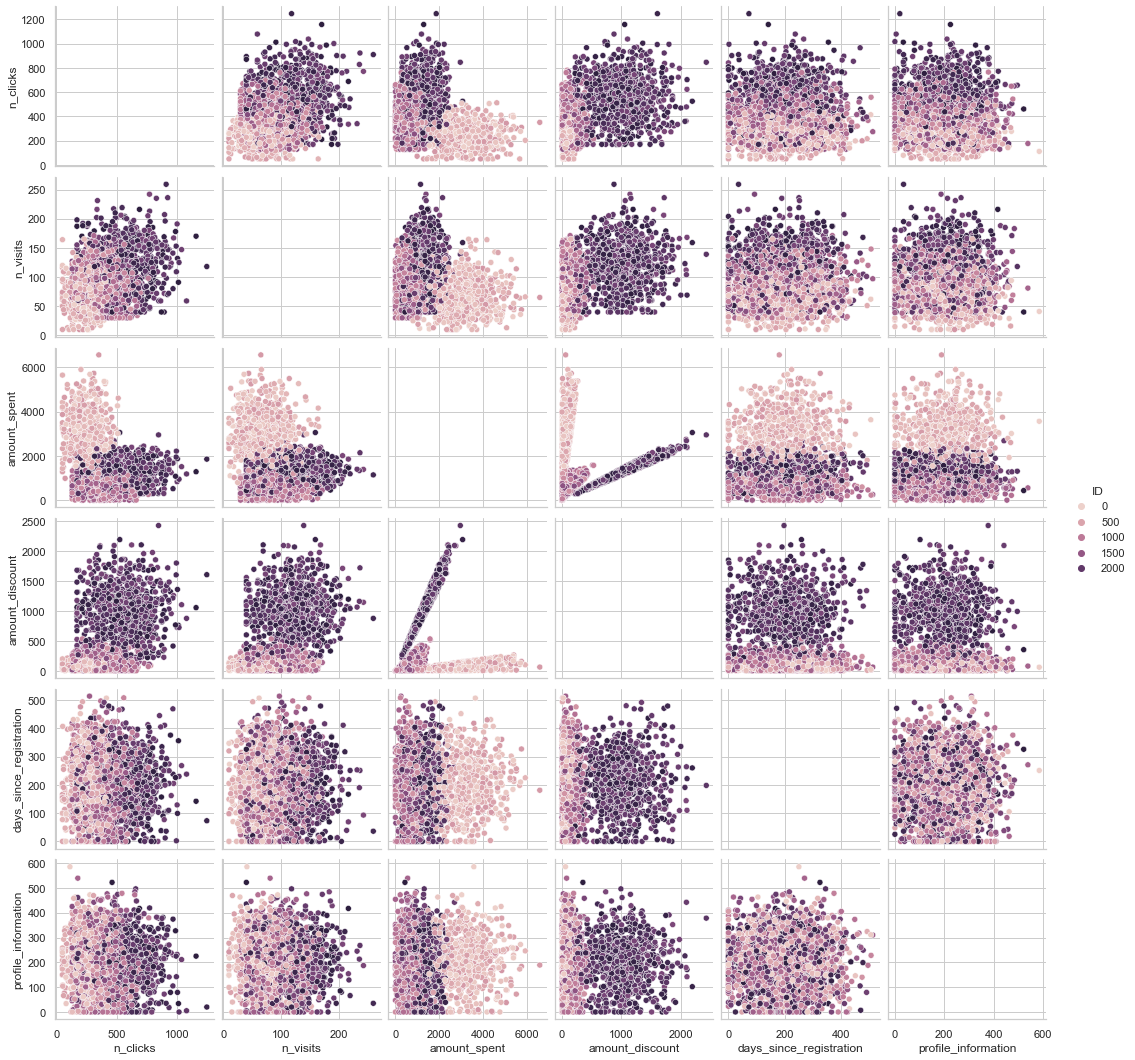

In [13]:
# Let's see a pair plot to see all the variables in one plot
sns.pairplot(df, hue = 'ID')
plt.show()

Here based on ID the different features behaves differently. With this we end up the EDA part. Next I'll perform feature engineering.